In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("asthma_disease_data.csv")
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [23]:
data.Diagnosis.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [24]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [26]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data.drop(columns=['PatientID'], inplace=True)

In [29]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)


['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis']


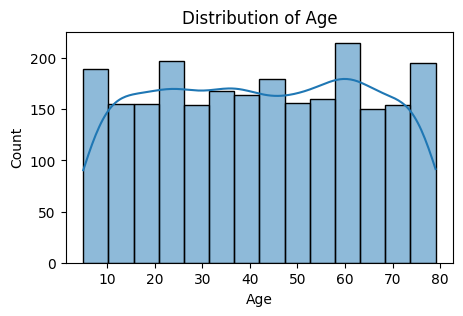

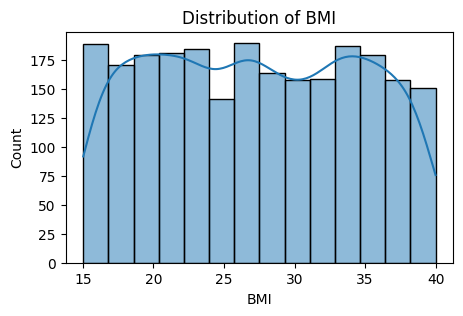

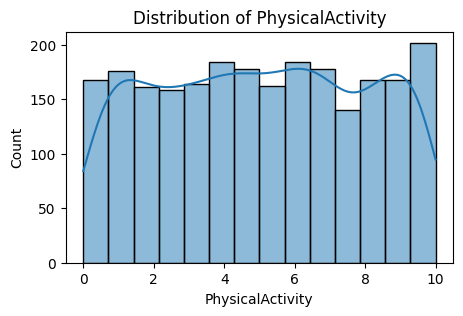

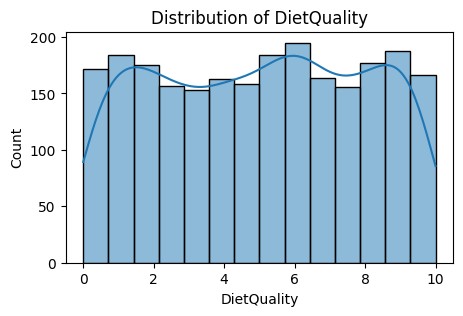

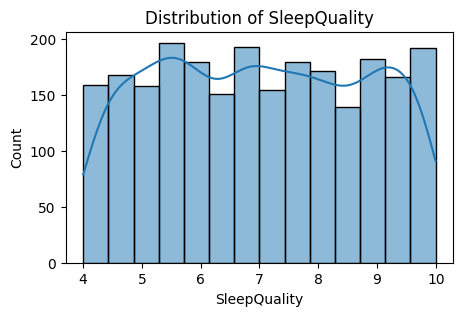

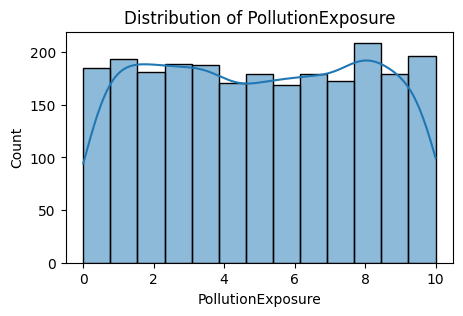

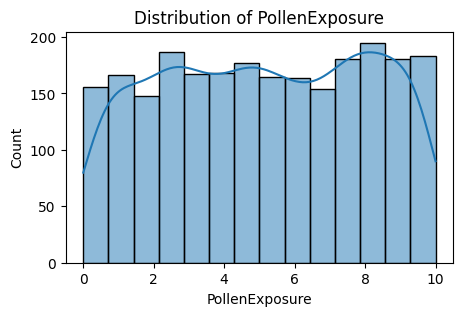

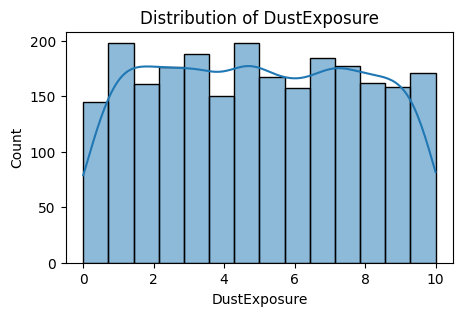

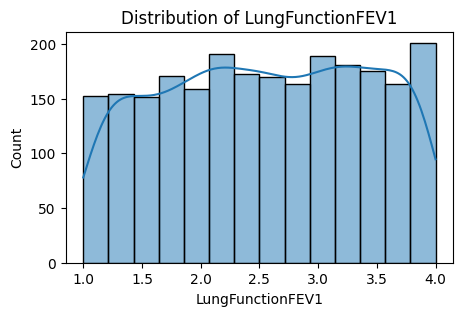

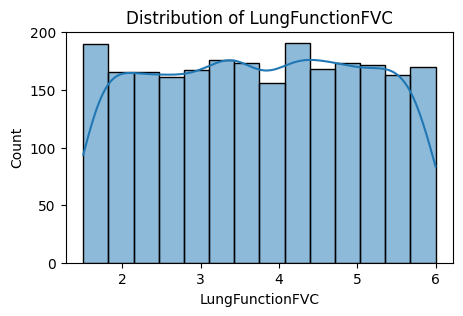

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data_1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [41]:
corr_matrix = data_1[cols].corr()
target_corr = corr_matrix.abs().mean().sort_values(ascending=False)

print("Potential Regression Targets Ranked by Correlation:")
print(target_corr)


Potential Regression Targets Ranked by Correlation:
PollutionExposure    0.120898
DustExposure         0.118331
BMI                  0.117638
PhysicalActivity     0.116204
DietQuality          0.114499
SleepQuality         0.114296
PollenExposure       0.112177
LungFunctionFVC      0.111289
Age                  0.110326
LungFunctionFEV1     0.109438
dtype: float64


In [33]:
# Step 1: Get numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Remove binary columns (those with only 2 unique values)
continuous_cols = [col for col in numeric_cols if data[col].nunique() > 2]

print("Continuous numeric columns (non-binary):")
print(continuous_cols)
data_1 = data[continuous_cols]

Continuous numeric columns (non-binary):
['Age', 'Ethnicity', 'EducationLevel', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC']


In [35]:
data_1

,Age,Ethnicity,EducationLevel,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
0,63,1,0,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,4.941206
1,26,2,2,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,1.702393
2,57,2,1,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,5.022553
3,40,2,1,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,2.300159
4,61,0,3,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,3.067944
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,0,2,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,3.125249,5.166032
2388,18,0,1,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,1.132977,5.509502
2389,54,3,2,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,1.685962,3.346877
2390,46,0,2,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,3.481549,1.713274


In [38]:
data_1.drop(columns=['Ethnicity', 'EducationLevel'], inplace=True)

/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_7513/3515386986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(columns=['Ethnicity', 'EducationLevel'], inplace=True)


In [39]:
cols = data_1.columns.tolist()

In [43]:
data_1.describe()

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,27.244877,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,2.548564,3.741270
std,21.606655,7.201628,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.861809,1.303689
min,5.000000,15.031803,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,1.000459,1.500045
25%,23.000000,20.968313,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,1.824113,2.607489
50%,42.000000,27.052202,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,2.553244,3.734982
75%,61.000000,33.555903,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,3.292897,4.864121
max,79.000000,39.985611,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,3.999719,5.999421


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [45]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [52]:
target = 'BMI'

# 🧠 Example feature grouping
binary_cols = ['Gender', 'Smoking', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis']  # example binary
continuous_cols = ['Age', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                   'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC']
categorical_cols = ['Ethnicity', 'EducationLevel', ]  # example categorical, if any

In [53]:
data_model = data.dropna(subset=[target])

In [54]:
# 🔄 Split
X = data_model[binary_cols + continuous_cols + categorical_cols]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), continuous_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('bin', 'passthrough', binary_cols)
])
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])


In [56]:
model.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
# 📊 Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 BMI Prediction Performance:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

📈 BMI Prediction Performance:
MAE  = 6.22
RMSE = 7.26
R²   = -0.03


In [58]:
from sklearn.ensemble import RandomForestRegressor

# Replace regression model
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', RandomForestRegressor(random_state=42, n_estimators=100))
])


In [59]:
data['BMI_Log'] = np.log1p(data['BMI'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
X = data[continuous_cols]
y = data['BMI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Train linear regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 BMI Prediction Performance (Continuous Features Only):")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


📈 BMI Prediction Performance (Continuous Features Only):
MAE  = 6.15
RMSE = 7.26
R²   = -0.01


In [64]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 BMI Prediction Performance (Random Forest):")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


📈 BMI Prediction Performance (Random Forest):
MAE  = 6.34
RMSE = 7.45
R²   = -0.08


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# 1. Select continuous numerical features (not binary or categorical)
continuous_cols = [col for col in data.columns 
                   if pd.api.types.is_numeric_dtype(data[col]) 
                   and data[col].nunique() > 10 
                   and col != 'BMI']

X = data[continuous_cols]
y = data['BMI']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (optional for XGBoost, but can help with interpretability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. XGBoost model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    objective='reg:squarederror'
)
model.fit(X_train_scaled, y_train)

# 5. Prediction & Evaluation
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("📈 BMI Prediction using XGBoost:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mohammed/Library/CloudStorage/OneDrive-KingSaudUniversity/Documents/VSCode-Workspace/macos/Python Workspace/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <98D50080-9632-3EA4-B874-146E55453763> /Users/mohammed/Library/CloudStorage/OneDrive-KingSaudUniversity/Documents/VSCode-Workspace/macos/Python Workspace/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


----

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [5]:
data.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

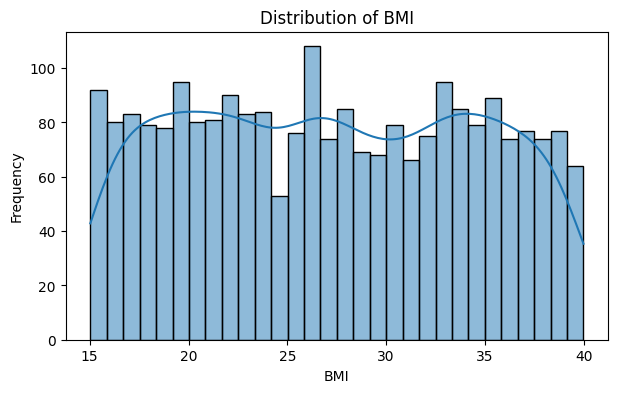

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Calculate correlation of BMI with all other columns
bmi_corr = data.corr(numeric_only=True)['BMI'].sort_values(ascending=False)
print("Correlation of BMI with other features:")
print(bmi_corr)

Correlation of BMI with other features:
BMI                       1.000000
DustExposure              0.064841
Wheezing                  0.045725
Gender                    0.023856
Age                       0.016184
ShortnessOfBreath         0.015136
HayFever                  0.014581
FamilyHistoryAsthma       0.014033
Ethnicity                 0.013947
Eczema                    0.012589
ExerciseInduced           0.011947
GastroesophagealReflux    0.010484
Smoking                   0.004890
EducationLevel            0.004501
PetAllergy                0.003994
LungFunctionFVC           0.003358
HistoryOfAllergies        0.001042
NighttimeSymptoms        -0.001453
Coughing                 -0.003992
ChestTightness           -0.009908
LungFunctionFEV1         -0.010356
PhysicalActivity         -0.012046
Diagnosis                -0.012522
PollenExposure           -0.012746
SleepQuality             -0.012891
DietQuality              -0.014996
PollutionExposure        -0.028962
Name: BMI, dtyp

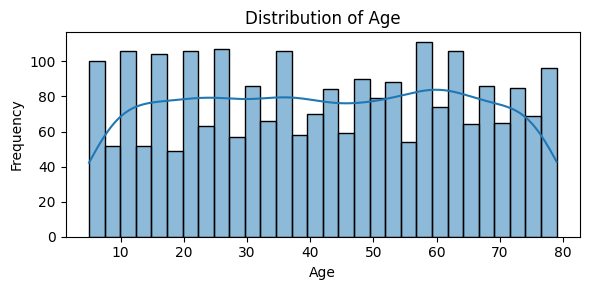

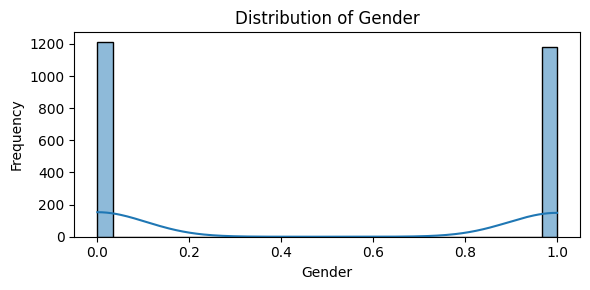

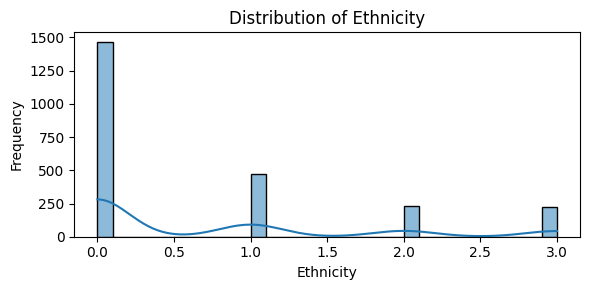

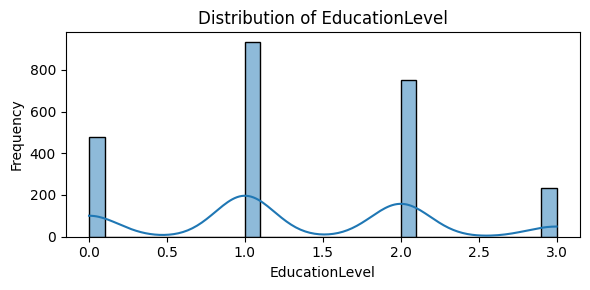

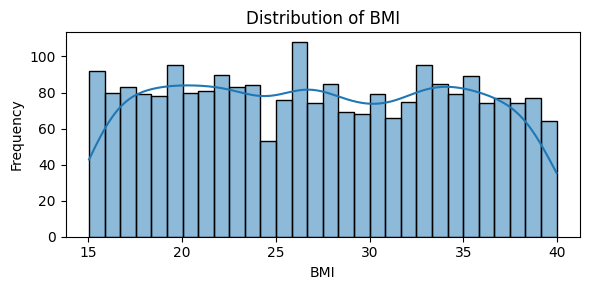

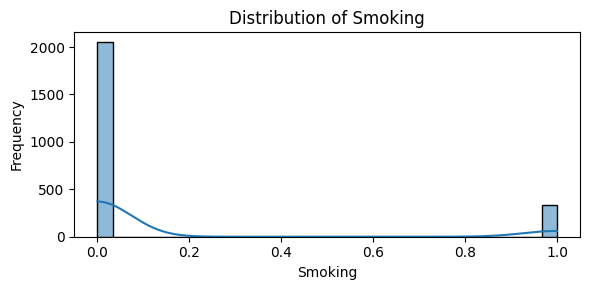

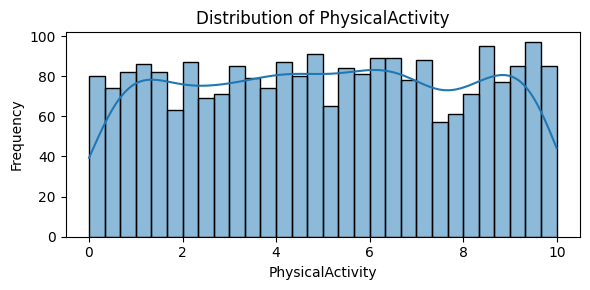

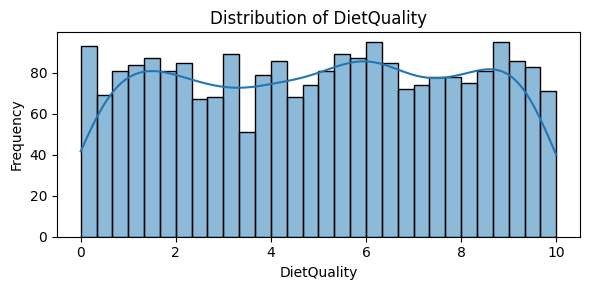

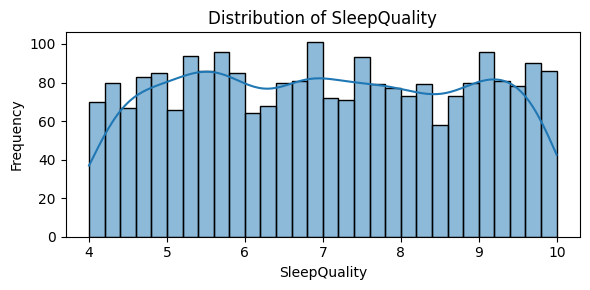

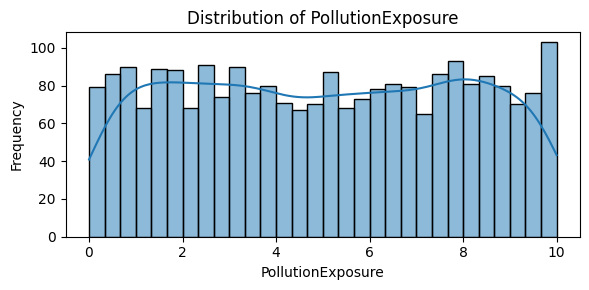

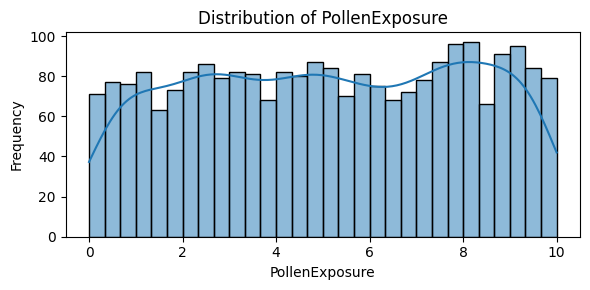

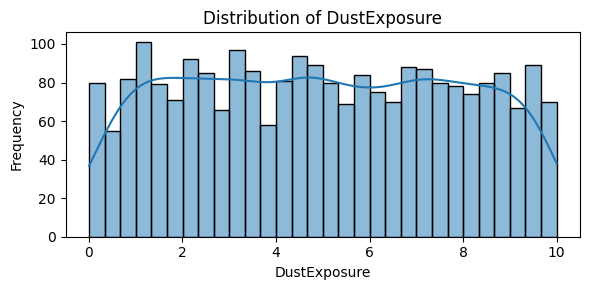

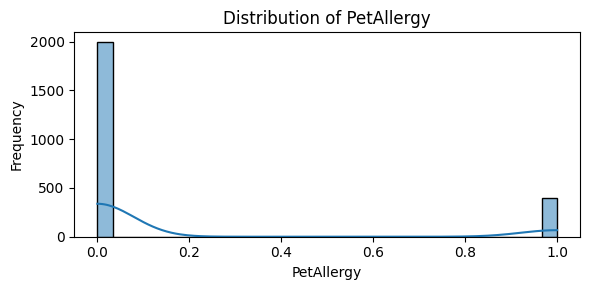

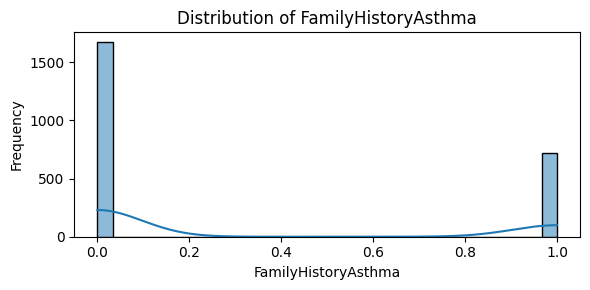

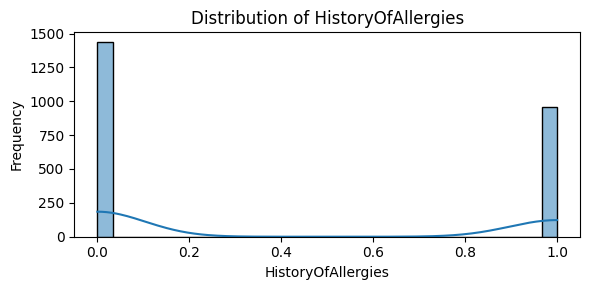

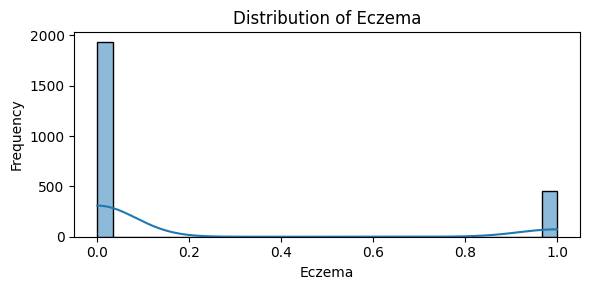

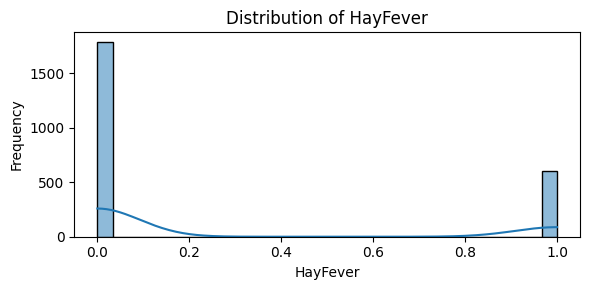

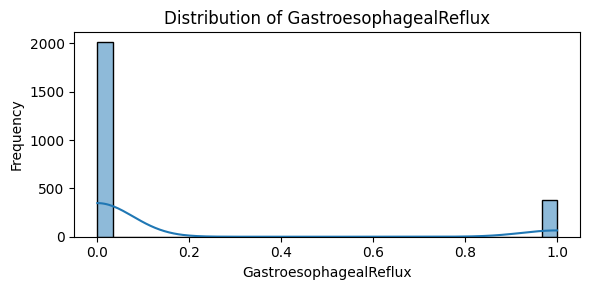

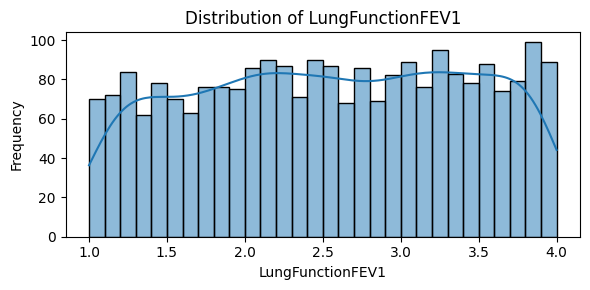

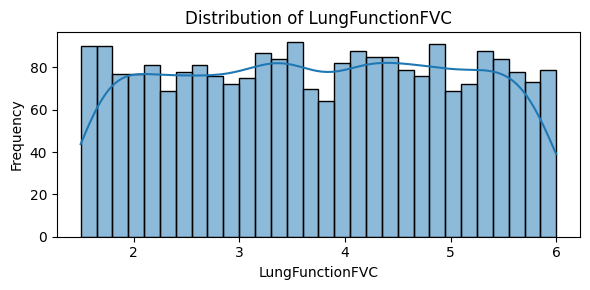

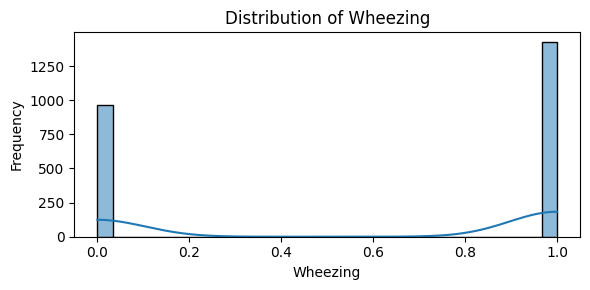

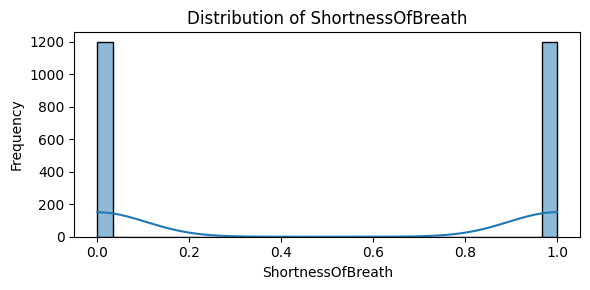

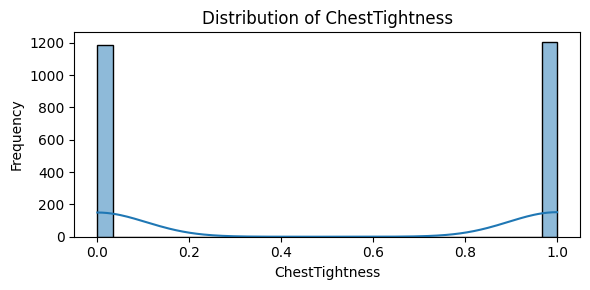

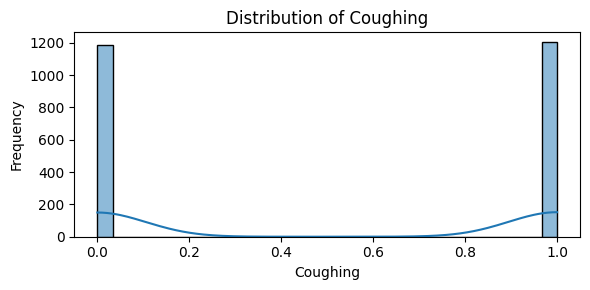

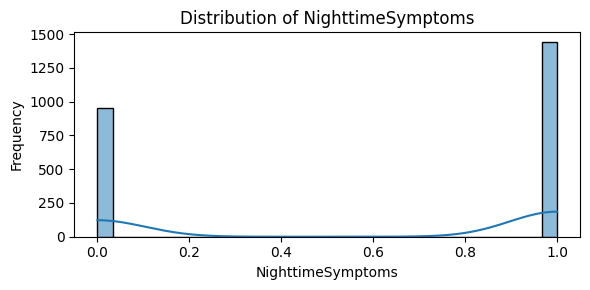

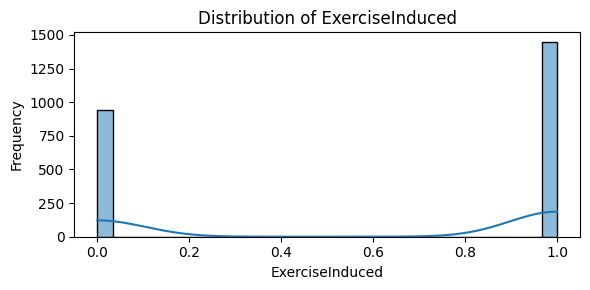

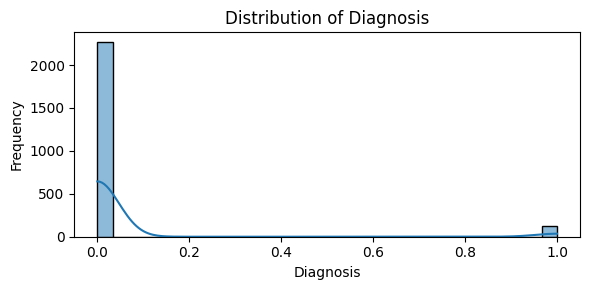

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

for col in data.columns:
    plt.figure(figsize=(6, 3))
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.histplot(data[col], kde=True, bins=30)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=data[col])
        plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['EducationLevel_1', 'Ethnicity_1']] = scaler.fit_transform(data[['EducationLevel', 'Ethnicity']])

In [12]:
df = data

In [22]:
df['LifestyleScore'] = (
    df['PhysicalActivity'] +
    df['DietQuality'] +
    df['SleepQuality']
    )

In [23]:
df['HistoryScore'] = (
    df['FamilyHistoryAsthma'] +
    df['HistoryOfAllergies'] +
    df['Eczema'] +
    df['HayFever'] +
    df['GastroesophagealReflux']
)


In [24]:
df['EnvironmentScore'] = (
    df['PollutionExposure'] +
    df['PollenExposure'] +
    df['DustExposure']
)


In [25]:
df['SymptomScore'] = (
    df['Wheezing'] +
    df['ShortnessOfBreath'] +
    df['ChestTightness'] +
    df['Coughing'] +
    df['NighttimeSymptoms'] +
    df['ExerciseInduced']
)


In [26]:
df['msr'] = (
    df['LungFunctionFEV1'] +
    df['LungFunctionFVC']
    )

In [27]:
df['SumBinary'] = (
    df['Gender'] +
    df['PetAllergy'] +
    df['Smoking']
    )


In [28]:
df['continuous'] = (
    df['PhysicalActivity'] +
    df['DietQuality'] +
    df['SleepQuality'] +
    df['PollutionExposure'] +
    df['PollenExposure'] +
    df['DustExposure'] +
    df['LungFunctionFEV1'] +
    df['LungFunctionFVC']
    )


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [33]:
df[['msr', 'continuous']]

,msr,continuous
0,6.310257,32.612801
1,3.900161,37.304605
2,6.720564,37.851396
3,5.332196,28.935332
4,6.538533,36.187160
...,...,...
2387,8.291281,38.955588
2388,6.642479,41.046601
2389,5.032838,40.799590
2390,5.194823,51.160444


In [ ]:
# Normalize the 'Gender' column to range [0, 1] using MinMaxScaler
df['Gender_norm'] = scaler.fit_transform(df[['1']])

In [ ]:
df['LifestyleScore'] = (
    df['PhysicalActivity'] +
    df['DietQuality'] +
    df['SleepQuality']
    )

df['msr'] = (
    df['LungFunctionFEV1'] +
    df['LungFunctionFVC']
    )

df['EnvironmentScore'] = (
    df['PollutionExposure'] +
    df['PollenExposure'] +
    df['DustExposure']
)


In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity', 'DietQuality', 'SleepQuality',
        'PollutionExposure', 'PollenExposure', 'DustExposure',
        'LungFunctionFEV1', 'LungFunctionFVC',
        'SumBinary', 'HistoryScore', 'SymptomScore',]]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.004, Std = 0.005
RandomForest: Mean = -0.047, Std = 0.017
GradientBoosting: Mean = -0.050, Std = 0.015
XGBoost: Mean = -0.263, Std = 0.045

Test Set Metrics:
LinearRegression: MAE = 6.159, MSE = 51.805, R² = -0.010
RandomForest: MAE = 6.384, MSE = 56.069, R² = -0.093
GradientBoosting: MAE = 6.334, MSE = 55.051, R² = -0.073
XGBoost: MAE = 6.955, MSE = 69.144, R² = -0.348

Ensemble Metrics:
MAE = 6.361, MSE = 55.498, R² = -0.082


In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity', 'DietQuality', 'SleepQuality',
        'PollutionExposure', 'PollenExposure', 'DustExposure',
        'LungFunctionFEV1', 'LungFunctionFVC',
        'HistoryScore', 'SymptomScore',]]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.005, Std = 0.004
RandomForest: Mean = -0.053, Std = 0.023
GradientBoosting: Mean = -0.047, Std = 0.009
XGBoost: Mean = -0.250, Std = 0.066

Test Set Metrics:
LinearRegression: MAE = 6.160, MSE = 51.840, R² = -0.011
RandomForest: MAE = 6.371, MSE = 55.888, R² = -0.090
GradientBoosting: MAE = 6.300, MSE = 54.500, R² = -0.062
XGBoost: MAE = 6.939, MSE = 68.212, R² = -0.330

Ensemble Metrics:
MAE = 6.327, MSE = 55.039, R² = -0.073


In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity', 'DietQuality', 'SleepQuality',
        'PollutionExposure', 'PollenExposure', 'DustExposure',
        'LungFunctionFEV1', 'LungFunctionFVC']]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.003, Std = 0.004
RandomForest: Mean = -0.057, Std = 0.026
GradientBoosting: Mean = -0.050, Std = 0.014
XGBoost: Mean = -0.249, Std = 0.023

Test Set Metrics:
LinearRegression: MAE = 6.152, MSE = 51.651, R² = -0.007
RandomForest: MAE = 6.395, MSE = 56.565, R² = -0.103
GradientBoosting: MAE = 6.313, MSE = 55.040, R² = -0.073
XGBoost: MAE = 6.811, MSE = 66.150, R² = -0.290

Ensemble Metrics:
MAE = 6.333, MSE = 55.024, R² = -0.073


In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity', 'DietQuality', 'SleepQuality',
        'PollutionExposure', 'PollenExposure', 'DustExposure']]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = 0.001, Std = 0.005
RandomForest: Mean = -0.062, Std = 0.028
GradientBoosting: Mean = -0.048, Std = 0.020
XGBoost: Mean = -0.252, Std = 0.047

Test Set Metrics:
LinearRegression: MAE = 6.152, MSE = 51.638, R² = -0.007
RandomForest: MAE = 6.343, MSE = 55.936, R² = -0.090
GradientBoosting: MAE = 6.332, MSE = 55.514, R² = -0.082
XGBoost: MAE = 6.835, MSE = 67.372, R² = -0.313

Ensemble Metrics:
MAE = 6.335, MSE = 55.301, R² = -0.078


In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity', 'DietQuality', 'SleepQuality']]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.003, Std = 0.003
RandomForest: Mean = -0.124, Std = 0.035
GradientBoosting: Mean = -0.059, Std = 0.013
XGBoost: Mean = -0.262, Std = 0.072

Test Set Metrics:
LinearRegression: MAE = 6.156, MSE = 51.674, R² = -0.007
RandomForest: MAE = 6.452, MSE = 57.544, R² = -0.122
GradientBoosting: MAE = 6.390, MSE = 54.901, R² = -0.070
XGBoost: MAE = 6.613, MSE = 64.966, R² = -0.266

Ensemble Metrics:
MAE = 6.304, MSE = 54.327, R² = -0.059


# Normalize

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [47]:
data[['PhysicalActivity_n', 'DietQuality_n', 'SleepQuality_n', 'LungFunctionFEV1_n', 'LungFunctionFVC_n', 'PollutionExposure_n', 'PollenExposure_n', 'DustExposure_n']] = scaler.fit_transform(data[['PhysicalActivity', 'DietQuality', 'SleepQuality', 'LungFunctionFEV1', 'LungFunctionFVC', 'PollutionExposure', 'PollenExposure', 'DustExposure']])

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity_n', 'DietQuality_n', 'SleepQuality_n',
        'PollutionExposure_n', 'PollenExposure_n', 'DustExposure_n',
        'LungFunctionFEV1_n', 'LungFunctionFVC_n']]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.003, Std = 0.004
RandomForest: Mean = -0.057, Std = 0.026
GradientBoosting: Mean = -0.050, Std = 0.014
XGBoost: Mean = -0.249, Std = 0.023

Test Set Metrics:
LinearRegression: MAE = 6.152, MSE = 51.651, R² = -0.007
RandomForest: MAE = 6.395, MSE = 56.565, R² = -0.103
GradientBoosting: MAE = 6.313, MSE = 55.040, R² = -0.073
XGBoost: MAE = 6.811, MSE = 66.150, R² = -0.290

Ensemble Metrics:
MAE = 6.333, MSE = 55.024, R² = -0.073


In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity_n', 'DietQuality_n', 'SleepQuality_n',
        'PollutionExposure_n', 'PollenExposure_n', 'DustExposure_n',
        ]]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = 0.001, Std = 0.005
RandomForest: Mean = -0.062, Std = 0.028
GradientBoosting: Mean = -0.048, Std = 0.020
XGBoost: Mean = -0.252, Std = 0.047

Test Set Metrics:
LinearRegression: MAE = 6.152, MSE = 51.638, R² = -0.007
RandomForest: MAE = 6.343, MSE = 55.936, R² = -0.090
GradientBoosting: MAE = 6.332, MSE = 55.514, R² = -0.082
XGBoost: MAE = 6.835, MSE = 67.372, R² = -0.313

Ensemble Metrics:
MAE = 6.335, MSE = 55.301, R² = -0.078


In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Feature matrix and target
X = df[['PhysicalActivity_n', 'DietQuality_n', 'SleepQuality_n',

        ]]
y = df['BMI']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

models = {
    'LinearRegression': lr,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {
    name: cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    for name, model in models.items()
}

# Train and test evaluation
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Ensemble including XGBoost
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
])
ensemble.fit(X_train, y_train)
y_ens_pred = ensemble.predict(X_test)

ensemble_metrics = {
    'MAE': mean_absolute_error(y_test, y_ens_pred),
    'MSE': mean_squared_error(y_test, y_ens_pred),
    'R2': r2_score(y_test, y_ens_pred)
}

# Results
print("Cross-Validation Scores (R²):")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

print("\nTest Set Metrics:")
for name, metrics in test_metrics.items():
    print(f"{name}: MAE = {metrics['MAE']:.3f}, MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

print("\nEnsemble Metrics:")
print(f"MAE = {ensemble_metrics['MAE']:.3f}, MSE = {ensemble_metrics['MSE']:.3f}, R² = {ensemble_metrics['R2']:.3f}")


Cross-Validation Scores (R²):
LinearRegression: Mean = -0.003, Std = 0.003
RandomForest: Mean = -0.124, Std = 0.035
GradientBoosting: Mean = -0.059, Std = 0.013
XGBoost: Mean = -0.262, Std = 0.072

Test Set Metrics:
LinearRegression: MAE = 6.156, MSE = 51.674, R² = -0.007
RandomForest: MAE = 6.452, MSE = 57.544, R² = -0.122
GradientBoosting: MAE = 6.390, MSE = 54.901, R² = -0.070
XGBoost: MAE = 6.613, MSE = 64.966, R² = -0.266

Ensemble Metrics:
MAE = 6.304, MSE = 54.327, R² = -0.059
